In [1]:
from keras.datasets import fashion_mnist

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 5s 1us/step


In [3]:
!pip install keras.utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2657 sha256=e5d14e619fa8d3dc1f3e307a780b0185ac56d3f7f3b23260a0e7be1e7b0afe6f
  Stored in directory: c:\users\prathyusha\appdata\local\pip\cache\wheels\2f\e9\19\d3d310a06735013bf467216222ebb92b1158c5d3ae006bf92a
Successfully built keras.utils


You should consider upgrading via the 'c:\users\prathyusha\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [6]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

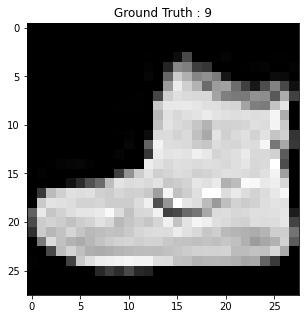

In [7]:
plt.figure(figsize=[5,5])
# Display the first image in training data
#plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 9')

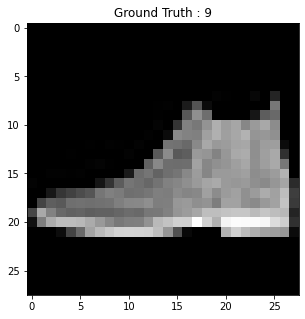

In [8]:
# Display the first image in testing data
plt.figure(figsize=[5,5])
#plt.subplot(121)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [9]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

−1 indicates that the length on the current axis needs to be automatically deduced according to the rule that the total elements of the tensor remain unchanged

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [11]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [12]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

In [26]:
batch_size = 64
epochs = 10
num_classes = 10

In [27]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
from tensorflow import keras

In [28]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [30]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
750/750 [==============================] - 58s 77ms/step - loss: 0.4680 - accuracy: 0.8308 - val_loss: 0.3482 - val_accuracy: 0.8707
Epoch 2/10
750/750 [==============================] - 57s 76ms/step - loss: 0.2877 - accuracy: 0.8934 - val_loss: 0.2773 - val_accuracy: 0.9001
Epoch 3/10
750/750 [==============================] - 55s 74ms/step - loss: 0.2425 - accuracy: 0.9101 - val_loss: 0.2559 - val_accuracy: 0.9050
Epoch 4/10
750/750 [==============================] - 60s 80ms/step - loss: 0.2089 - accuracy: 0.9234 - val_loss: 0.2392 - val_accuracy: 0.9100
Epoch 5/10
750/750 [==============================] - 70s 94ms/step - loss: 0.1827 - accuracy: 0.9320 - val_loss: 0.2224 - val_accuracy: 0.9212
Epoch 6/10
750/750 [==============================] - 65s 86ms/step - loss: 0.1622 - accuracy: 0.9394 - val_loss: 0.2332 - val_accuracy: 0.9194
Epoch 7/10
750/750 [==============================] - 65s 86ms/step - loss: 0.1396 - accuracy: 0.9479 - val_loss: 0.2331 - val_accuracy:

In [31]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2736280858516693
Test accuracy: 0.9182000160217285
